In [1]:
import networkx as nx
import operator

---
Read the graph from a text file.

Note: text file should be in adjacency list form

In [2]:
directed_graph = nx.read_adjlist('train.txt', create_using = nx.DiGraph(), nodetype = int)


Display the graph:

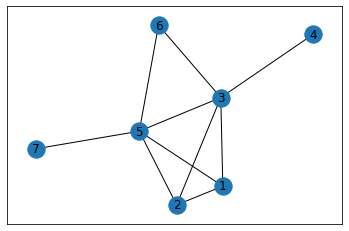

In [3]:
undirected_graph = directed_graph.to_undirected()
nx.draw_networkx(undirected_graph)

---
## Degree Centrality

In [4]:
degree_centrality_dict = nx.degree_centrality(undirected_graph)

sorted_values = sorted(degree_centrality_dict.items(), 
                       key=operator.itemgetter(1), 
                       reverse=True)

# Get the necessary value for denormalizing degree centrality measurements.
node_count = len(undirected_graph.nodes())     
denormalization_value = node_count - 1

for item in sorted_values:
    print('Node {}: '.format(item[0]), end='')
    print(int(item[1] * denormalization_value))     # Display the values (denormalized)
print()

Node 3: 5
Node 5: 5
Node 1: 3
Node 2: 3
Node 6: 2
Node 4: 1
Node 7: 1



---
## Betweenness Centrality

In [5]:
betweenness_centrality_dict = nx.betweenness_centrality(undirected_graph)

sorted_values = sorted(betweenness_centrality_dict.items(), 
                       key=operator.itemgetter(1), 
                       reverse=True)

for item in sorted_values:
    print('Node {}: '.format(item[0]), end='')
    print(format(item[1]))
print()

Node 3: 0.4
Node 5: 0.4
Node 1: 0.0
Node 2: 0.0
Node 4: 0.0
Node 6: 0.0
Node 7: 0.0



---
## Closeness Centrality

In [6]:
closeness_centrality_dict = nx.closeness_centrality(undirected_graph)

sorted_values = sorted(closeness_centrality_dict.items(), 
                       key=operator.itemgetter(1), 
                       reverse=True)

for item in sorted_values:
    print('Node {}: '.format(item[0]), end='')
    print(format(item[1]))
print()

Node 3: 0.8571428571428571
Node 5: 0.8571428571428571
Node 1: 0.6666666666666666
Node 2: 0.6666666666666666
Node 6: 0.6
Node 4: 0.5
Node 7: 0.5



---
## Clustering Coefficient

In [7]:
all_calculations = []

for node in undirected_graph.nodes(): 
    neighbours = [n for n in nx.neighbors(undirected_graph, node)]
    n_neighbors = len(neighbours)
    n_links = 0
    if n_neighbors > 1:
        for node1 in neighbours:
            for node2 in neighbours:
                if undirected_graph.has_edge(node1, node2):
                    n_links += 1
        n_links /= 2 #because n_links is calculated twice
        clustering_coefficient = n_links / (0.5 * n_neighbors * (n_neighbors - 1))
        single_node_calculation = [node, float(clustering_coefficient)]
        #print(single_node_calculation)
    else:
        single_node_calculation = [node, float(0)]
        #print(single_node_calculation)
    all_calculations.append(single_node_calculation)
    
sorted_values = sorted(all_calculations, 
                       key=operator.itemgetter(1), 
                       reverse=True)

for item in sorted_values:
    print('Node {}: '.format(item[0]), end='')
    print(format(item[1]))
print()

Node 1: 1.0
Node 2: 1.0
Node 6: 1.0
Node 3: 0.4
Node 5: 0.4
Node 4: 0.0
Node 7: 0.0

